In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Setting default size of plots
sns.set(rc={'figure.figsize': (9, 6)})

### **Problem Description**

There is a large percentage of people who sign up for a course or start a course but don't make it to the end.

We need to find out why users drop out of the course and how to make the course not drop out, what can be improved for this purpose?

### **Data Description**

events_train.csv - data on actions performed by students with steps

* step_id - step id
* user_id - anonymized user id
* timestamp - time of event occurrence in unix date format
* action - event, possible values: 
    * discovered - user moved to the step
    * viewed - view step,
    * started_attempt - the beginning of an attempt to solve a step, previously it was necessary to explicitly click on the button - start solving, before starting to solve a practical step.
    * passed - successful solution of the practical step

submissions_train.csv - data on time and statuses of submissions to practical tasks

* step_id - step id
* timestamp - time of solution submission in unix date format
* submission_status - solution status
* user_id - anonymized user id

### **EDA**

In [5]:
# Reading data
events = pd.read_csv('event_data_train.zip')
submissions = pd.read_csv('submissions_data_train.zip')

In [6]:
events.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [7]:
submissions.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [8]:
events.dtypes

step_id       int64
timestamp     int64
action       object
user_id       int64
dtype: object

In [9]:
events.describe()

,step_id,timestamp,user_id
count,3.480703e+06,3.480703e+06,3.480703e+06
mean,3.487358e+04,1.480288e+09,1.331468e+04
std,1.422243e+04,3.068906e+07,7.779099e+03
min,3.045600e+04,1.434341e+09,1.000000e+00
25%,3.217900e+04,1.450271e+09,6.642000e+03
50%,3.292900e+04,1.483904e+09,1.320800e+04
75%,3.348100e+04,1.507889e+09,2.014400e+04
max,1.584330e+05,1.526773e+09,2.679800e+04


In [10]:
events['action'].unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [11]:
# Making column 'date' with format datetime from 'timestamp' column
events['date'] = pd.to_datetime(events['timestamp'], unit='s')
events.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [12]:
submissions['date'] = pd.to_datetime(submissions['timestamp'], unit='s')
submissions.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [13]:
events.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [14]:
events.date.min()

Timestamp('2015-06-15 04:00:48')

In [15]:
events.date.max()

Timestamp('2018-05-19 23:33:31')

In [16]:
# From date column make day column
events['day'] = events['date'].dt.date
events.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [17]:
submissions['day'] = submissions['date'].dt.date
submissions.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


#### See the distribution of events made by users

<Axes: xlabel='day'>

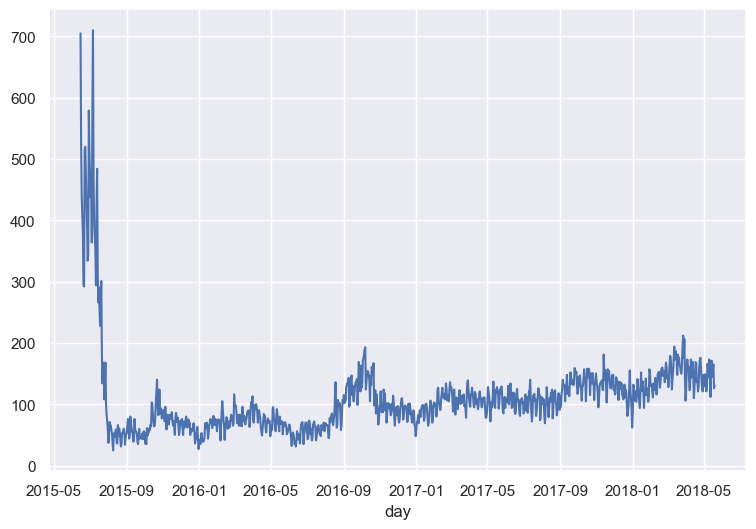

In [18]:
# See the distribution of events made by users by days
events.groupby('day')['user_id'].nunique().plot()

<Axes: >

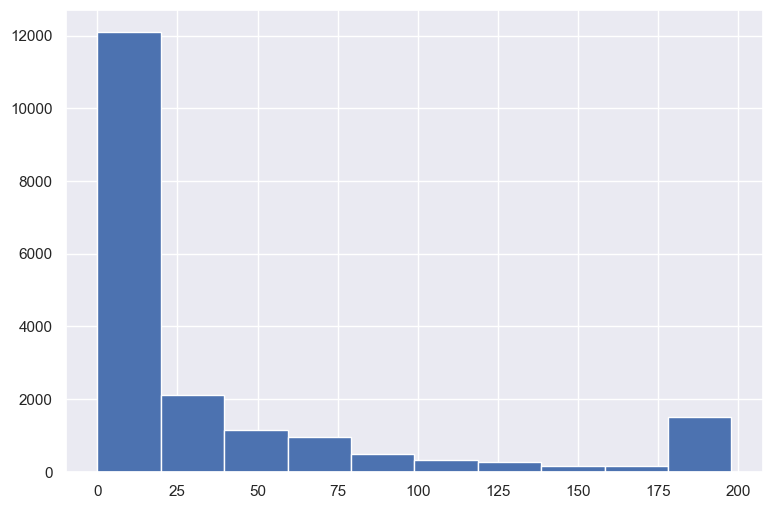

In [19]:
# Making pivot table with amount of each action for one user (user_id)
users_events_data = events.pivot_table(index='user_id', 
                   columns='action', 
                   values='step_id', 
                   aggfunc='count', 
                   fill_value=0).reset_index()
users_events_data['discovered'].hist()

In [20]:
# Making pivot table with amount of each submission_status for one user (user_id)
user_scores = submissions.pivot_table(index='user_id', 
                   columns='submission_status', 
                   values='step_id', 
                   aggfunc='count', 
                   fill_value=0).reset_index()
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


#### Let's look at the distribution of learning breaks among users

In [21]:
# For each user make array of timestamp diffs between two nearest days with events from this user
gap_data = events[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [22]:
# Make one array for all diffs
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [23]:
# Diffs in seconds to diffs in days
gap_data = gap_data / (24 * 60 * 60)

<Axes: >

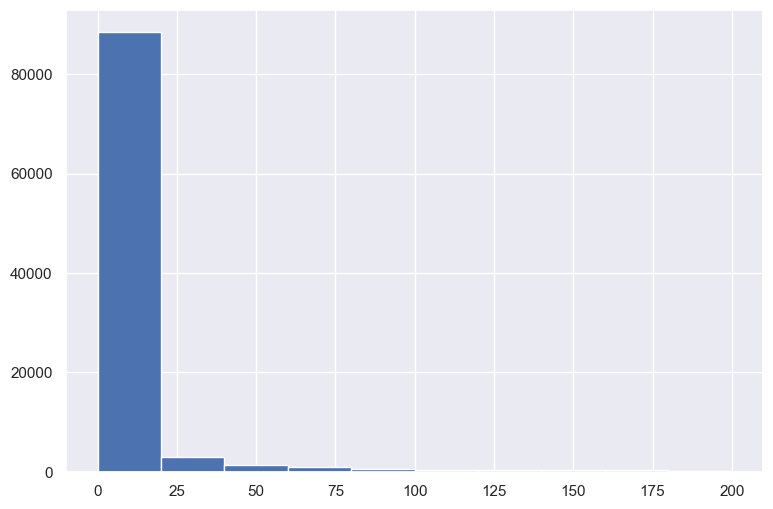

In [24]:
# See distribution
gap_data[gap_data < 200].hist()

In [25]:
# Find quantile 0.95 and quantile 0.90
print(gap_data.quantile(0.95), gap_data.quantile(0.90))

59.760440972222156 18.325995370370403


We will use number = 30 between quantile 0.95 and quantile 0.90 as a criterion for the person to be considered as a dropout (if a person has not attended the course for so many days, we will assume that he has dropped out of the course).

Using the found number (= 30), we divide usera into dropouts and not-dropouts (students or course completion)

In [26]:
# For each user find their last timestamp
users_data = events.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}) \
    .rename(columns={'timestamp':'last_timestamp'})

In [27]:
events.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


We will consider that today 2018-05-19 as this is last day in dataset and we will count difference from this day (timestamp = 1526772811).

In [28]:
now = 1526772811
dropout_threshold = 30 * 24 * 60 * 60    # 30 days in seconds

In [29]:
# If diffs between today and last event of user is more than 30 days and 
# user have not yet finished the course means they dropped
users_data['is_gone'] = (now - users_data.last_timestamp) > dropout_threshold

We will consider that the user has completed the course if he has passed 170 steps.

To find out if the user has completed the course we will merge the current table with the table of another data.

In [30]:
users_data = users_data.merge(user_scores, on='user_id', how='outer')
users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [31]:
# Fill NaN with 0
users_data = users_data.fillna(0)
users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [32]:
# Add to our dataset other info about user
users_data = users_data.merge(users_events_data, how='outer')
users_data.head()


,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [33]:
# Make dataset with amount of different days of actions for each user
users_days = events.groupby('user_id')['day'].nunique().to_frame().reset_index()
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [34]:
# Add amount of days to users_data
users_data = users_data.merge(users_days, how='outer')
users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


Check that we have not lost users during the calculations

In [35]:
users_data.user_id.nunique()

19234

In [36]:
events.user_id.nunique()

19234

Calculate if the user passed/completed the course or not (passed if passed 170 steps and more else not passed)

In [37]:
users_data['passed_course'] = users_data['passed'] > 170

In [38]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [39]:
# per cent of persons who passed course
1425 / 17809 * 100 

8.001572238755687

### **Data preparing**

In [ ]:
# How many days was active students who passed course
users_data[users_data.passed_course].day.median()

20.0

<Axes: >

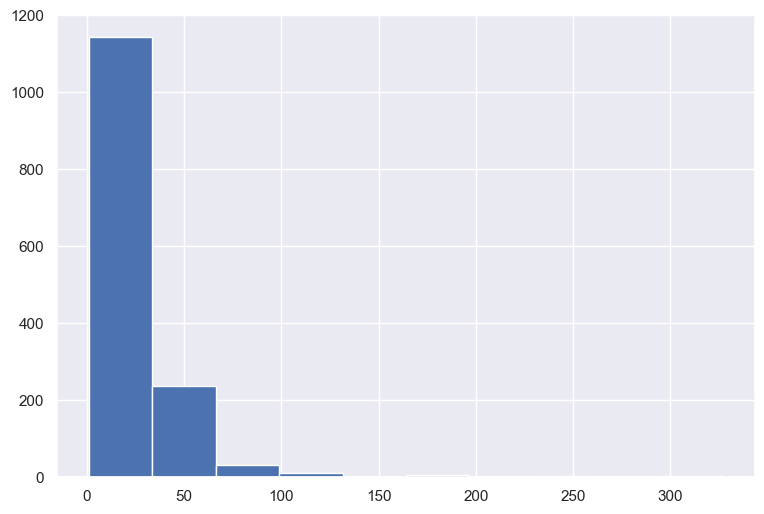

In [43]:
users_data[users_data.passed_course].day.hist()

In [ ]:
# For each user find his minimum time
user_min_time = events.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename(columns={'timestamp': 'min_timestamp'})

In [49]:
user_min_time.head(10)

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
5,8,1480603427
6,9,1484999434
7,11,1526140624
8,14,1436366155
9,16,1435674765


In [50]:
users_data = users_data.merge(user_min_time, how='outer')

In [51]:
users_data.head()

,user_id,last_timestamp,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [ ]:
# Filter events only in first 72 hours of studing for each user
events_data_train = events[events['timestamp'] <
                           events.merge(users_data[['user_id', 'min_timestamp']], how='left')
                           .min_timestamp + 3 * 24 * 60 * 60]

In [58]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [ ]:
# Check that we filtered 72 hours (4 unique days is ok)
events_data_train.groupby('user_id').day.nunique().max()

4

In [98]:
submissions_data_train = submissions[submissions['timestamp'] <
                           submissions.merge(users_data[['user_id', 'min_timestamp']], how='left')
                           .min_timestamp + 3 * 24 * 60 * 60]
submissions_data_train.groupby('user_id').day.nunique().max()

4

Extra task: Use the sabmits data to find the task after which most people quit the course

For each user, find the step that he/she failed to solve and did not try to solve other steps after that. Then find the id of the step which was the final point of practical learning in the course for maximum number of users.

In [59]:
submissions.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [87]:
user_last_submissions = submissions[submissions['submission_status'] == 'wrong'].groupby(['user_id', 'step_id'], as_index=False) \
    .agg({'timestamp': 'max'})

In [88]:
user_last_submissions.head()

,user_id,step_id,timestamp
0,3,31977,1434359541
1,3,31983,1441488141
2,3,32031,1441443212
3,3,32075,1441452329
4,3,32173,1441445879


In [82]:
user_last_submissions[user_last_submissions['submission_status'] == 'wrong'].head()

,user_id,step_id,timestamp,submission_status
33,8,31986,1480603825,wrong
35,8,32089,1480603834,wrong
44,14,33983,1436368601,wrong
121,17,32031,1465764761,wrong
198,25,32812,1524736541,wrong


In [90]:
last_steps = user_last_submissions\
    .groupby('step_id', as_index=False).agg({'user_id': pd.Series.nunique})

In [91]:
last_steps.head()

,step_id,user_id
0,31971,2517
1,31972,3064
2,31976,2034
3,31977,2332
4,31978,3423


In [ ]:
last_steps.sort_values(by='user_id', ascending=False).head()

,step_id,user_id
4,31978,3423
11,32031,3255
1,31972,3064
19,32202,2614
0,31971,2517


### **Create train dataset**

In [118]:
# Create train dataset with amount of days that user study in first 72 hours
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns = {'day': 'days'})

In [119]:
# Create dataset with amount of steps that user try in first 72 hours
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns = {'step_id': 'steps_tried'})

In [120]:
# To train dataset add amount of steps that user try in first 72 hours
X = X.merge(steps_tried, on='user_id', how='outer')

In [121]:
# Train dataset merge with pivot table with amount of each submission_status for each user (user_id)
# in first 72 hours of study
X = X.merge(submissions_data_train.pivot_table(index='user_id', 
                   columns='submission_status', 
                   values='step_id', 
                   aggfunc='count', 
                   fill_value=0).reset_index())

In [122]:
# Add column with percentage of correct steps in first 72 hours
X['correct_ration'] = X.correct / (X.correct + X.wrong)

In [123]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ration
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [124]:
# To train dataset add pivot table with amount of each action for one user (user_id) in fist 72 hours
X = X.merge(events_data_train.pivot_table(index='user_id', 
                   columns='action', 
                   values='step_id', 
                   aggfunc='count', 
                   fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [125]:
X = X.fillna(0)

In [127]:
# To train dataset add target boolean variable (if user passed course?)
X = X.merge(users_data[['user_id', 'passed_course', 'is_gone']], how='outer')

In [128]:
# Filter train dataset from active users (not passed an not gone)
X = X[~((X.is_gone == False) & (X.passed_course == False))]

In [ ]:
# Check
X.groupby(['passed_course', 'is_gone']).user_id.count()

passed_course  is_gone
False          True       16560
True           False        141
               True        1284
Name: user_id, dtype: int64

In [131]:
# Move target value to another dataset
y = X.passed_course.map(int)
X = X.drop(['passed_course', 'is_gone'], axis=1)

In [132]:
# Move user_id from features to index (for training)
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [133]:
X.head()

,days,steps_tried,correct,wrong,correct_ration,viewed
user_id,,,,,,
1,0.0,0.0,0.0,0.0,0.0,1
2,1.0,2.0,2.0,0.0,1.0,9
3,1.0,4.0,4.0,4.0,0.5,20
5,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,1


In [134]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: passed_course, dtype: int64

#### **Prediction with decision tree**

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from tqdm import tqdm

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)

In [148]:
for max_depth in tqdm(max_depth_values):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

100%|██████████| 99/99 [00:23<00:00,  4.18it/s]


In [149]:
scores_data.cross_val_score.max()

0.9216531023874854

<Axes: xlabel='max_depth', ylabel='cross_val_score'>

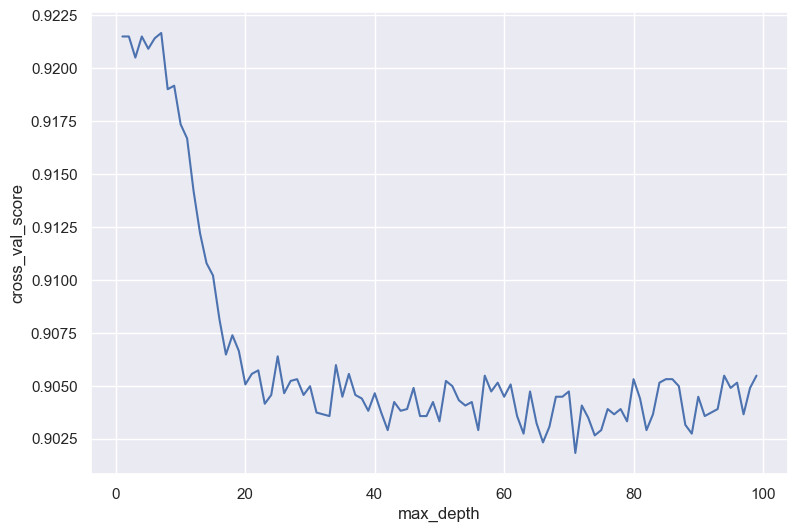

In [150]:
sns.lineplot(x='max_depth', y='cross_val_score', data=scores_data)

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 100)}
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [153]:
grid_search_cv_clf.fit(X_train, y_train)

c:\Users\abelchenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)})

In [154]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [155]:
best_clf = grid_search_cv_clf.best_estimator_

In [156]:
best_clf.score(X_test, y_test)

0.9225067385444744

In [180]:
y_predicted = best_clf.predict_proba(X_test)

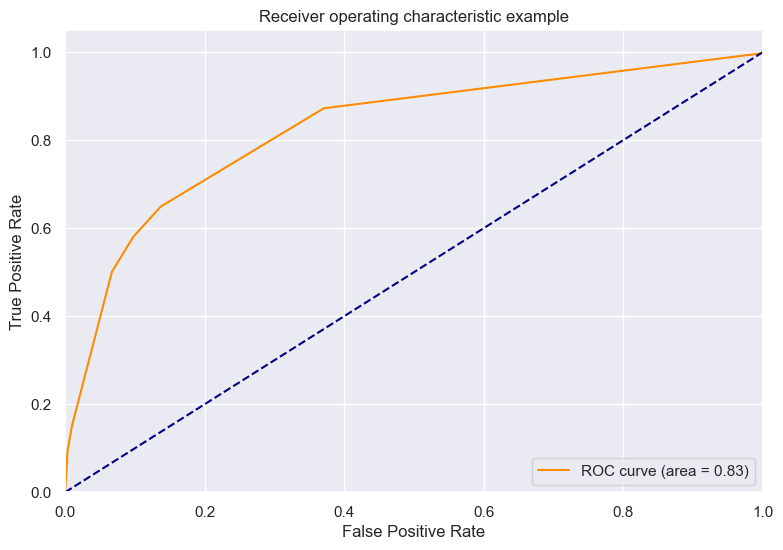

In [181]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### **Prediction with random forest**

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf_clf = RandomForestClassifier()

In [159]:
params = {'n_estimators': range(10, 51, 10),
          'max_depth': range(1, 12, 2),
          'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 10, 2)}

In [160]:
gridsearch_clf = GridSearchCV(rf_clf, params, cv=3, n_jobs=-1)

In [161]:
gridsearch_clf.fit(X_train, y_train)

c:\Users\abelchenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [162]:
gridsearch_clf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 50}

In [163]:
best_rf_clf = gridsearch_clf.best_estimator_

In [164]:
feature_importances = best_rf_clf.feature_importances_

In [166]:
feature_importances_df = pd.DataFrame({'features': X_train.columns,
                                       'feature_importances': feature_importances})

In [169]:
# See what are the most important features for this model
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=False)

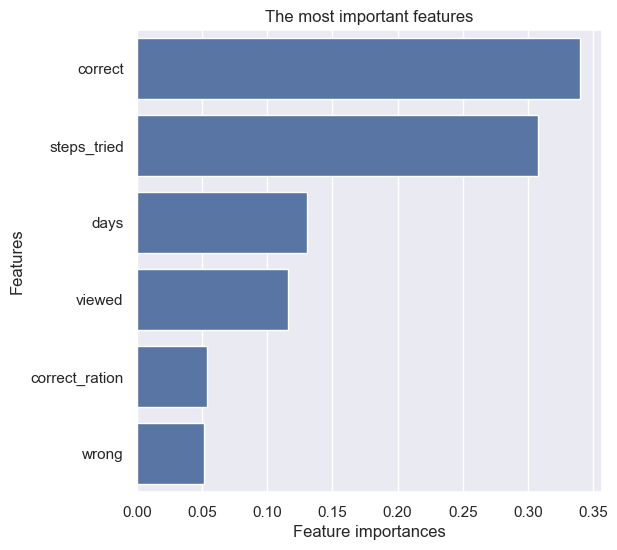

In [170]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Feature importances')
plt.ylabel('Features')
plt.title("The most important features")
plt.show()

In [178]:
y_predicted_prob = best_rf_clf.predict_proba(X_test)

In [175]:
y_predicted_prob[:,0]

array([0.98305563, 0.98305563, 0.8697318 , ..., 0.98305563, 0.98305563,
       0.9279828 ])

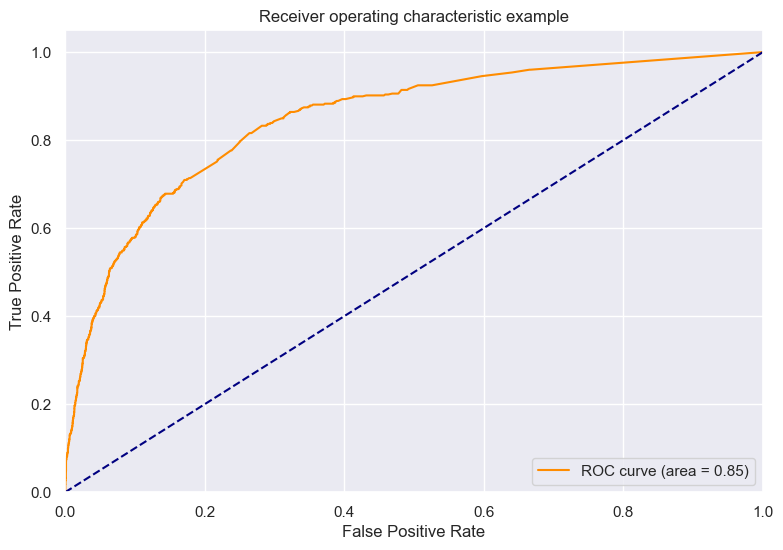

In [179]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()